In [3]:
!pip install keras

  Using cached https://files.pythonhosted.org/packages/44/e1/dc0757b20b56c980b5553c1b5c4c32d378c7055ab7bfa92006801ad359ab/Keras-2.4.3-py2.py3-none-any.whl


twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 20.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/82/f7/e43cefbe88c5fd371f4cf0cf5eb3feccd07515af9fd6cf7dbf1d1793a797/wrapt-1.12.1.tar.gz
  Using cached https://files.pythonhosted.org/packages/a3/de/c648ef6835192e6e2cc03f40b19eeda4382c49b5bafb43d88b931c4c74ac/google_pasta-0.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/79/4c/7c3275a01e12ef9368a892926ab932b33bb13d55794881e3573482b378a7/Keras_Preprocessing-1.1.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e9/ed/5853ec0ae380cba4588eab1524e18ece1583b65f7ae0e97321f5ff9dfd60/tensorflow_estimator-2.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/b9/07/f69dd3367368ad69f174bfe426a973651412ec11d48ec05c000f19fe0561/absl_py-0.10.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2b/03/1

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
google-auth 1.21.2 has requirement setuptools>=40.3.0, but you'll have setuptools 40.2.0 which is incompatible.
tensorboard 2.3.0 has requirement setuptools>=41.0.0, but you'll have setuptools 40.2.0 which is incompatible.
Could not install packages due to an EnvironmentError: [WinError 5] Acceso denegado: 'C:\\Users\\juank\\AppData\\Local\\Temp\\pip-uninstall-wks62oyq\\users\\juank\\anaconda3\\lib\\site-packages\\numpy\\core\\multiarray.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

You are using pip version 10.0.1, however version 20.2.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Clase 13: Neural Networks in Action

En esta clase vamos a aprender a utilizar la libreria de keras para realizar implementaciones de redes neuronales. Utilizaremos un ejemplo de regresión y uno de clasificación, utilizando bases de datos que se encuentran en keras

## Implementación de una red neuronal para clasificación.

En este caso utilizaremos el problema de clasificación de digitos del 0 al 9.

In [6]:
from keras.datasets import mnist
# Dividimos lso datos en entrenamiento y pureba
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Cantidad de datos
print('El tamaño de los datos de entrenamiento es:', train_images.shape)
print('El tamaño de los labels de entrenamiento es:', train_labels.shape)
print('El tamaño de los datos de prueba es:', test_images.shape)
print('El tamaño de los labels de prueba es:', test_labels.shape)

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

Ahora observemos alguno de los numeros:

<function matplotlib.pyplot.show(*args, **kw)>

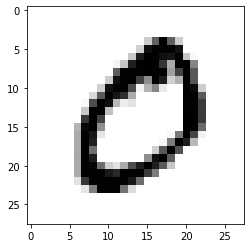

In [65]:
digit = train_images[1]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show

Ahora creamos la arquitectura de la red. Esto se hace utilizando un modelo secuencial de capas.

In [67]:
# Inicializando los parametros de la red neuronal

from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='sigmoid'))
network.compile(optimizer = 'rmsprop',
                loss='categorical_crossentropy',
               metrics=['accuracy'])

Ahora preprocesamos lso datos par apoder ingresarlos al modelo:

In [68]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255

Ahora preparamos las etiquetas volviendolas variables categoricas:

In [69]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Ahora entrenamos la red:

In [70]:
network.fit(train_images, train_labels, epochs=7, batch_size = 128)

Epoch 1/7
469/469 [==============================] - 2s 3ms/step - loss: 0.4358 - accuracy: 0.8827
Epoch 2/7
469/469 [==============================] - 1s 3ms/step - loss: 0.2363 - accuracy: 0.9315
Epoch 3/7
469/469 [==============================] - 1s 3ms/step - loss: 0.1821 - accuracy: 0.9468
Epoch 4/7
469/469 [==============================] - 2s 3ms/step - loss: 0.1448 - accuracy: 0.9577
Epoch 5/7
469/469 [==============================] - 1s 3ms/step - loss: 0.1184 - accuracy: 0.9650
Epoch 6/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0988 - accuracy: 0.9707
Epoch 7/7
469/469 [==============================] - 1s 3ms/step - loss: 0.0829 - accuracy: 0.9756


In [71]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 544us/step - loss: 0.0934 - accuracy: 0.9717
test_acc: 0.9717000126838684


## Implementación de un ared Neuronal para Regresión

Para este casa utilizaremos los datos del Boston Housing dataset.

In [73]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data,test_targets) = boston_housing.load_data()

print('El tamaño de los datos de entrenamiento es:', train_data.shape)
print('El tamaño de los labels de entrenamiento es:', train_targets.shape)
print('El tamaño de los datos de prueba es:', test_data.shape)
print('El tamaño de los labels de prueba es:', test_targets.shape)

57344/57026 [==============================] - 0s 1us/step
El tamaño de los datos de entrenamiento es: (404, 13)
El tamaño de los labels de entrenamiento es: (404,)
El tamaño de los datos de prueba es: (102, 13)
El tamaño de los labels de prueba es: (102,)


Ahora normalizamos los datos:

In [74]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /=std

Ahora construimos la red:

In [76]:
model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',
                       input_shape=(train_data.shape[1],)))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [79]:
model.fit(train_data, train_targets, epochs=70, batch_size = 128, verbose=0)

In [80]:
test_loss, test_acc = model.evaluate(test_data, test_targets)
print('test_acc:', test_acc)

4/4 [==============================] - 0s 614us/step - loss: 23.0483 - mae: 3.6545
test_acc: 3.65450382232666


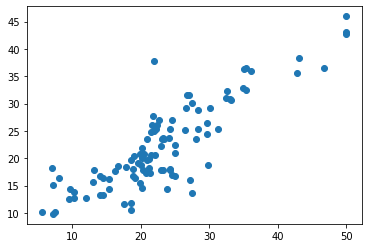

In [82]:
test_pred = model.predict(test_data)
plt.scatter(test_targets,test_pred)